# Numerical Adaptive Methods on the Gravitational Two Body Problem

### Sebastián Gil, UBC 

## Introduction 

![twobody](https://www.worldatlas.com/r/w728-h425-c728x425/upload/4c/55/b8/untitled-design-163.jpg)

The gravitational two-body problem and the solution thereof are an essential part of an education in astrophysics. It consists of two-point masses interacting via a central force. Historically, its solution motivated the Newotnian paradigm of classical mechanics. Given the force for Newtonian Gravitation

$$
F_N = -G\frac{Mm}{\vec{r}^2}
$$

begin by taking the limit in which $m << M$. By application of Newton's Second Law, one gets the equation of motion

$$
m\frac{d^2 \vec{r}}{dt^2} = -\frac{GMm}{r^2}\frac{\vec{r}}{r} 
$$

Without loss of generality, take $z=0$ and constrain the value of the particles' motion $\vec{r}$ to be some coordinates $(X,Y)$

## Characteristic Length and Time Scales

Identify $t$ as the independent variable with $X$and $Y$ as dependent variables. Then define the following relations

\begin{eqnarray}
X &=& xL \\
Y &=& yL \\
t &=& \tau T
\end{eqnarray}

Now constrain motion to the plane so that 

\begin{eqnarray}
r^2 &=& X^2 + Y^2 \\
r &=& \sqrt{X^2 + Y^2}
\end{eqnarray}

Then substituting the values from the characteristic length,

\begin{eqnarray}
r &=& \sqrt{(xL)^2+(yL)^2} \\
r &=& L \sqrt{X^2 + L^2}
\end{eqnarray}

Now the equation of motion can be rewritten in vector notation as

\begin{equation}
m\frac{d^2<xL,yL>}{d(\tau T)^2} = -\frac{GMm <xL,yL>}{[(xL)^2 + (yL)^2]^{3/2}}
\end{equation}

Reduce and simplify

\begin{eqnarray}
\frac{mL}{T^2}\frac{d^2<x,y>}{d\tau^2}&=&-\frac{GMmL<x,y>}{[L^2(x^2 + y^2)]^{3/2}}\\
\frac{d^2<x,y>}{d\tau^2}&=&\frac{-T^2}{mL}\frac{GMmL<x,y>}{L^3(x^2+y^2)^{3/2}}\\
\frac{d^2<x,y>}{d\tau^2}&=&\frac{-GMT^2}{L^3}\frac{<x,y>}{(x^2+y^2)^{3/2}}\\
\end{eqnarray}

Now define the quantity

$$
\gamma = \frac{GMT^2}{L^3}
$$

which is dimensionless. Thus, one may rewrite the problem in natural units via the equations of motion

\begin{eqnarray}
\frac{d^2x}{d\tau^2} &=& -\gamma\frac{x}{r^3} \\
\frac{d^2y}{d\tau^2} &=& -\gamma\frac{y}{r^3}
\end{eqnarray}

For the remainder of the numerical experiment, we will work with $\gamma = 1$

## Reduce the Order of the Equations 

In order to solve the above system numerically, it is necessary to reduce the order of the differential equations. Begin by writing

\begin{equation}
\frac{d^2x}{d\tau^2} + \frac{x}{r^3} = 0
\end{equation}

and define the functions $\phi_1(\tau) = x(\tau)$ and $\phi_2(\tau) = x'(\tau)$ Then differentiate both sides of each equation:

\begin{equation}
\phi_1'(\tau) = x'(\tau) = \phi_2(\tau)
\end{equation}

and

\begin{eqnarray}
\phi_2'(\tau) &=& x''(\tau) \\
&=& -\frac{1}{r^3}x(\tau)\\
&=& -\frac{1}{r^3}\phi_1(\tau)
\end{eqnarray}

The problem is thereby reduced to a system of two first order equations:

\begin{eqnarray}
\phi_1'(\tau) &=& \phi_2(\tau) \\
\phi_2'(\tau) &=& -\frac{1}{r^3}\phi_1(\tau)
\end{eqnarray}

Consider now the equation

\begin{equation}
\frac{d^2y}{d\tau^2} + \frac{y}{r^3} = 0
\end{equation}

Define also $\psi_1(\tau) = y(\tau)$ and $\psi_2(\tau) = y'(\tau)$. Then, by the exact same logic as above, another system of equations is obtained:

\begin{eqnarray}
\psi_1'(\tau) &=& \psi_2(\tau) \\
\psi_2'(\tau) &=& -\frac{1}{r^3}\psi_1(\tau)
\end{eqnarray}

To represent the notation in something that is more familiar to kinematics, identify the vectors $\vec{r} = <\phi_1(\tau),\psi_1(\tau)>$ and $\vec{v} = <\phi_2(\tau),\psi_2(\tau)>$. This finally defines the system of equations to be integrated numerically:

\begin{eqnarray}
x'(\tau) &=& v_x(\tau) \\
y'(\tau) &=& v_y(\tau) \\
v_x'(\tau) &=& -\frac{1}{r^3}x(\tau) \\
v_y'(\tau) &=& -\frac{1}{r^3}y(\tau)
\end{eqnarray}

subject to the constraint $r(\tau) = \sqrt{x(\tau)^2 + y(\tau)^2}$

## Implementation of Code

In what follows, the system of differential equations will be solved under three numerical paradigms:

* the Euler method
* the 4th order Runge-Kutta Method (RK4)
* RK4 with adaptive step-size

In [2]:
#import modules
from numpy import array,arange,asarray,zeros
from matplotlib.pyplot import plot,xlabel,ylabel,title,show
%matplotlib inline

In [3]:
# Set interval to compute time
a = 0.
b = 1.
# Set initial conditions of the particle
x_0 = 1./4
y_0 = 0.
vx_0 = 0.
vy_0 = 1

In [4]:
# Assign initial conditions to the vector R
R_0 = array([x_0,y_0,vx_0,vy_0])
# Urgent: This value CANNOT be overwritten!

In [5]:
# define distance function
def r3(x,y):
    return (x**2 + y**2)**1.5

In [6]:
# Define a function that evaluates the coupled
# differential equations
def eqns(R,t):
    x = R[0]
    y = R[1]
    vx = R[2]
    vy = R[3]
    return array([vx,vy,(-1*x/r3(x,y)),(-1*y/r3(x,y))])

In addition to solving the orbit of the particle, we will test how well the numerical methods conserve energy and angular momentum in the system. It will be necessary to define some quantities:

* Energy of the particle per unit mass:

\begin{equation}
\frac{H}{m} = \frac{T}{m} + \frac{V}{m} = \frac{1}{2}v^2 - \frac{1}{r}
\end{equation}

* Angular momentum of the particle per unit mass:

\begin{equation}
\frac{\vec{l}}{m} = \frac{\vec{r} \times \vec{p}}{m} = \vec{r} \times \vec{v} = (xv_y - yv_x)\hat{k}
\end{equation}

In [7]:
# compute the initial energy and angular momentum
H_0 = 0.5*(vx_0**2 + vy_0**2) - 1/(x_0**2 + y_0**2)**0.5
L_0 = x_0*vy_0 - y_0*vx_0

In [8]:
H_0

-3.5

In [9]:
L_0

0.25

### Euler Method 

In [10]:
# Define the solver for the system
# First input is a vector of dynamical quantities
# Second input is the step-size
def euler_soln(R,h):
# Initialize counter
    n = 0
# Create lists for time, position, and velocity points
# with the initial value
    t_n = arange(a,b+h,h)
    x_n = [R[0]]
    y_n = [R[1]]
    vx_n = [R[2]]
    vy_n = [R[3]]
    r_n = []
# Compute distance
    r3t = r3(R[0],R[1])
    r_n.append(r3t)
# Execute iterative methods
    for t in t_n:
# Add values to arrays
        x_n.append(R[0])
        y_n.append(R[1])
        vx_n.append(R[2])
        vy_n.append(R[3])
        r_n.append(r3t)
# Update values from coupled differential equations
        R += h*eqns(R,t)
# Increase function call counter
        n += 1
# Combine all results into a list of arrays
    orbit = [t_n,asarray(x_n),asarray(y_n),asarray(vx_n),asarray(vy_n),asarray(r_n),n]
    return orbit

### Runge-Kutta 4th Order 

In [11]:
# Define the solver for the system
# First input is a vector of dynamical quantities
# Second input is the step-size
def rk4_soln(R,h):
# Initialize counter
    n = 0
# Create lists for time, position, and velocity points
# with the initial value
    t_n = arange(a,b+h,h)
    x_n = [R[0]]
    y_n = [R[1]]
    vx_n = [R[2]]
    vy_n = [R[3]]
    r_n = []
# Compute distance
    r3t = r3(R[0],R[1])
    r_n.append(r3t)
# Execute iterative methods
    for t in t_n:
# Add values to arrays
        x_n.append(R[0])
        y_n.append(R[1])
        vx_n.append(R[2])
        vy_n.append(R[3])
        r_n.append(r3t)
# Compute Runge-Kutta coefficients
        k1 = h*eqns(R,t)
        k2 = h*eqns(R + 0.5*k1, t + 0.5*h)
        k3 = h*eqns(R + 0.5*k2, t + 0.5*h)
        k4 = h*eqns(R + k3, t + h)
        R += (k1 + 2*k2 + 2*k3 +k4)/6
# Increase function call counter
        n += 1
# Combine all results into a list of arrays
    orbit = [t_n,asarray(x_n),asarray(y_n),asarray(vx_n),asarray(vy_n),asarray(r_n),n]
    return orbit

### Runge-Kutta with Adaptive Step-Size 

In [12]:
# Define a function that computes the rk4 method for a single time step
def rk4step(R,eqns,h):
    k1 = h*eqns(R,t)
    k2 = h*eqns(R + 0.5*k1, t + 0.5*h)
    k3 = h*eqns(R + 0.5*k2, t + 0.5*h)
    k4 = h*eqns(R + k3, t + h)
    Rout = R + (k1 + 2*k2 + 2*k3 + k4)/6
    return Rout
# Define the solver for the system
# First input is a vector of dynamical quantities
# Second input is the step-size
# Third input is the tolerance parameter
def rk4ad(R,h):
# Create lists for time, position, and velocity points
    t_n = arange(a,b+h,h)
    x_n = []
    vx_n = []
    y_n = []
    vy_n = []
    r_n = []
# Assign initial conditions from input
    x = R[0]
    y = R[1]
    vx = R[2]    
    vy = R[3]
# Compute distance
    r3t = r3(x,y)
# Initial time and counter
    t = 0
    n = 0
# Initialize while loop
    while t <= b:
# Initial condition
        R1 = r4step(R,eqns,h)
        n += 4
# First iteration
        R1 = rk4step(R1,eqns,h)
        n += 4
        R2 = rk4step(R,eqns,2*h)
        counter += 4
# Mysterious mathemagics here...
        epsi = ((R1[0]-R2[0])**2 + (R1[1]-R2[1])**2)**0.5
        rho  = 30.0*d*h/epsi
# Implement condtional testing
        if rho > 1: #increase step-size and move to next time step
            h = h*rho**0.25
            t_n.append(t)
            x_n.append(R[0])
            y_n.append(R[1])
            vx_n.append(R[2])
            vy_n.append(R[3])
            t += 2*h
            R = R1
        else: #try again with a smaller step size
            h = h*rho**0.25
    return t_n,x_n,vx_n,y_n,vy_n

### Conservation Laws 

In [13]:
# Define a function to compute the Hamiltonian
def hamiltonian(R):
    return (0.5*(R[2]**2 + R[3]**2)**0.5 - 1/(R[0]**2 + R[1]**2)**0.5)
# Define a function to complete the angular momentum
def angular(R):
    return (R[0]*R[3] - R[1]*R[2])

In [14]:
# test output
hamiltonian(R_0)

-3.5

In [15]:
angular(R_0)

0.25

## Expectations

 The problem at hand is a two body gravitational problem in which the mass for which we are solving the system is much smaller than the mass it is being attracted to. Hence, based on Kepler’s Laws, we expect to see the trajectory of the particle to follow a closed ellipse. Moreover, from conservation laws we also expect that the total energy of the system and its angular momentum are conserved at each point in time. This behavior is obtained under the premise of analyticity—the idea that the time step for evaluation is infinitesimally small. A computer is unable to use infinitesimals, but we expect that as the step size gets smaller, the trajectory of the particle will more closely resemble an ellipse while the energy and angular momentum will vary less from the initial values.

In the case of the Euler method, the finite difference is obtained from a straight line approximation. This means that at larger step sizes, error will accumulate rapidly to the point that the trajectory of the body will fail to be a closed ellipse. Moreover, the conserved quantities will vary significantly due to the fact that the particle’s position is being approximated at discrete steps, which violates the time translational invariance and analyticity from which conservation laws are obtained. The first problem can be resolved by making the step size small enough that you get an $n$-sided polygon with sufficient sides that it resembles an ellipse. Making the step size smaller should also make the fluctuations in angular momentum and energy smaller, but will not be able to get rid of them completely. 

The Runge-Kutta method will exhibit behavior similar to the Euler method because it is derived from it. In the case of the 4th order method, however, the finite difference is obtained from a polynomial approximation, which is bound to perform significantly better than a straight line approximation. Hence, much fewer data points will be needed to obtain a closed ellipse and have the conserved quantities approach towards convergence.

By using adaptive step size controls, it is possible to significantly reduce the number of computations needed in the Runge-Kutta method. As described in the implementation, the parameter $\rho$ serves as a gauge to determine whether the trajectory of the particle varies significantly between $h$ and $2h$. If it finds that the error is small, it will increase the step size and evaluate at the next step. This results in “smooth” areas being evaluated with significantly less step sizes—greatly saving computation time when compared to fixed step sizes. On the other hand, if the error is very large, the time step will be made smaller and evaluated again. This will result in more precise iterations in the areas over which the trajectory varies significantly. In other words, the adaptive step size control has the advantage of picking the time steps such that more iterations are carried out at the points in time over which the system’s change in behavior is more pronounced.

## Results from Numerical Experiments 

Experiments are to be repeated at the following step-size values:
1. $h = 10^{-2}$
2. $h = 10^{-3}$
3. $h = 10^{-4}$
4. $h = 10^{-6}$

### Euler Method 

#### Differential Equation Solution 

In [16]:
R = array([x_0,y_0,vx_0,vy_0])
first_euler = euler_soln(R,0.01)

In [17]:
# note that for this method the number of function calls is equal to the number of time steps
first_euler[-1] == len(first_euler[0])

True

In [19]:
# compute remaining orbits for specified step-sizes
R = array([x_0,y_0,vx_0,vy_0])
second_euler = euler_soln(R,0.001)

In [21]:
R = array([x_0,y_0,vx_0,vy_0])
third_euler = euler_soln(R,0.0001)

In [22]:
R = array([x_0,y_0,vx_0,vy_0])
fourth_euler = euler_soln(R,0.000001)

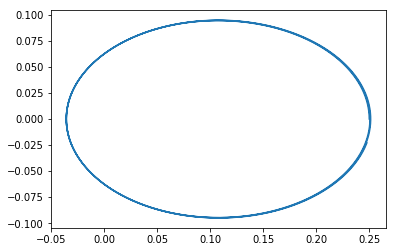

In [23]:
plot(fourth_euler[1],fourth_euler[2])

#### Conservation of Energy Test 

#### Conservation of Angular Momentum Test 

#### Length of Calculations 

#### Plotting Results 

In [3]:
# begin with matplotlib and move on to other plotting libraries

In [1]:
import pandas

In [4]:
import seaborn

ImportError: No module named 'seaborn'

### RK4 

#### Differntial Equation Solution 

#### Conservation of Energy Test 

#### Conservation of Angular Momentum Test 

#### Length of Calculations 

### RK4 Adapative 

#### Differntial Equation Solution 

#### Conservation of Energy Test 

#### Conservation of Angular Momentum Test 

#### Length of Calculations 

## Discussion 

### Euler Method 

As discussed in my expectations, the simulations ended up behaving exactly like I expected. Indeed, for the largest step size of 10-2, we find that the error in the approximation is so large that the trajectory fails to yield an ellipse. The main cause for this is that there are not enough data points to simulate the behavior of the system properly. When the order of h is reduced to 4, we already begin to observe a change in the trajectory yielding a circular motion, but it spirals out because the linear approximations of the Euler method prevent the trajectory to return to the initial position. It is only until an order of 6 is used in h that the ellipse finally closes, meaning that at this point we obtain the “n-sided polygon” that I mentioned above.
	
   In terms of the energy and angular momentum of the system, neither quantity is conserved. It is interesting to note how for both quantities the change goes like a ladder of sorts evidencing regions where the error is constant before taking a further dip. The reason behind this is that the dips occur at the points at which the trajectory of the body is changing the most, whereas the places where the change in energy and angular momentum is constant denote the parts in the trajectory where the ellipse is smooth. Once h goes like 10-6, however, it is worth noting that these errors are of order 10-3 for the energy and 10-4 for the angular momentum. If the precision of the problem is not of tremendous importance, then the Euler method can be deemed to yield a reasonable estimate for the particle’s motion at this order of h.

### RK4 

The main thing to notice this is that this method returns closed ellipses at $h = 10^{-3}$, which is three orders of magnitude smaller than the required value for the Euler method. This confirms my hypothesis that, because this method uses a polynomial approximation, the incidence of error is much less pronounced. This is further confirmed by the plots denoting the change in energy and angular momentum. Except for $h = 10^{-2}$, the order of the errors is significantly smaller than what was observed for the Euler method. Indeed, at $h = 10^{-4}$ the change in energy goes like $10^{-8}$ and the change in angular momentum goes like $10^{-11}$, which I deem to be negligible fluctuations for all practical applications. This method is by far more effective than the Euler method.
	
   It is of interest to note that the energy plots for the runge-kutta exhibit dips at the same places in time that the Euler method did. This supplements the possibility that error is accumulated at the places in the body’s orbit where its trajectory changes the most. Unlike the Euler method, the changes in angular momentum are positive as opposed to negative. I do not fully understand why and don’t think that it’s a simple issue of the fact that the initial angular momentum is positive—otherwise the Euler method would show the same behavior. This would be an interesting avenue of further investigation.

### RK4 Adapative 

It’s impressive to notice how with delta 1e-2 you almost get a closed ellipse. The reason why I rejected this value of delta is because the initial points where the particle is at $x = 0.25$ prevent fitting the points to an ellipse. Decreasing the order of delta to 1e-3 already yields better results and at 1e-4 the closed ellipse is definite. Moreover, from the scatter plots we can discern that this adaptive method indeed does compute more iterations at the places where the trajectory is changing the most, which completely satisfies my initial expectations for this method.

### Number of Iterations 

Because the runge-kutta needs to evaluate f(R,t) four times, it results in more computations at the same order as the  Euler method. However, it yields a closed ellipse at a significantly smaller order than the Euler method, so this method is undoubtedly much faster. The magic truly happens when the adaptive method is implemented, however. The f(R,t) function is still called four times per iteration, but the rho criterion that allows the while loop to adjust at which point of t the function is next to be evaluated makes a much better use of  computation time. Indeed, this adaptive method tells the runge-kutta method to “run ahead” where the function is smooth and to “tread carefully” where there is much change in the system’s behavior.

This, of course, is evidenced in the scatter plot, where the density of points is higher at the extremes of the ellipse. Indeed, the best result for the adaptive method only required 1032 function calls, while the runge-kuta method needed $4000004$, which is about 103 times as many steps! The caveat here is that I haven’t looked at how the adaptive method computed energy and angular momentum. I do believe, however, that because the adaptive method has more iterations at the regions where the trajectory changes the most—the places where the dips in the energy and angular momentum plots come from for the rk4 and euler method—it should still be just as good if not better than the regular rk4 method. Extending this method to compute energy and angular momentum is almost trivial, and would be more than worth to explore.


### Improve Presentation
Remember the Anaconda Webinar

1. Data exploration
	Jupyter + Pandas
 	"you have some sense of what's in the data"
	df = pd.read_csv('')
	df.head()
	df[['','']].groupby[''].aggregate(np.sum)
	pandas calls matplotlib as a sub-routine
	holoview: hv.Curve(variable), which uses bokeh for dependencies
	like in bqplot, you can overlay after the fact with text and such
	holoviews also allows to change input variables via selection tools
	seaborn/bokeh can give you a grid of plots comparing all variables 		against each other
	interacts save on recomputing time
	so many notebooks, incredibly huge data sets too!
	datashading --> massive datasets 10**9 points
		plot phone data as an image updated w.r.t. resolution
2. Report generation
	Essential to learn how to convert plots back into narrative
	plt.savefig("".pdf)
	you can use holoviews to remove interact layers and force png,svg, 		pdf files
	but you can also output HTML directly!!! (great plug for site!)
	this output a page, which you can embed within an existing page or 		blog :o)
	alternatively, you can download the notebook as .html, or turn 		into a presentation with RISE
	static dataset <==> static page

### Possibilities for Extension

1. Build [phase space portraits](https://en.wikipedia.org/wiki/Phase_space) at convergence
2. Test orbits at different initial conditions
3. Study [chaotic behavior](https://en.wikipedia.org/wiki/Chaos_theory#Sensitivity_to_initial_conditions) from tuning into convergence
4. Compare results vs. those from the built-in `scipy.odeint` method
5. Compile functions into a module